# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

<span style="color:red">Q1: 34 Q2: 54 Total: 88</span>

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 1 iamlans`

You can check the status of your submissions with the `show submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

In [2]:
# Your code goes here
#Load the datasets train_20news_partA.csv 
train_20news_partA_loc = os.path.join(os.getcwd(), 'datasets', 'train_20news_partA.csv')
train_20news_partA = pd.read_csv(train_20news_partA_loc)

#Load the datasets train_20news_partB.csv
train_20news_partB_loc = os.path.join(os.getcwd(), 'datasets', 'train_20news_partB.csv')
train_20news_partB = pd.read_csv(train_20news_partB_loc)

<span style="color:red">Good</span>

### ========== Question 1.2 ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

In [3]:
# Your code goes here
train_20news_partA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


<span style="color:red">Good</span>

### ========== Question 1.3 ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

*Your answer goes here*  
There are 2129 **data points** and 521 **attributes**.

<span style="color:red">There are 520 attributes and last column represents the target class.</span>

### ========== Question 1.4  ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

In [4]:
# Your code goes here
train_20news_partA.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


<span style="color:red">Good</span>

### ========== Question 1.5 ==========
Display the first 7 instances of dataset A.

In [5]:
# Your code goes here
train_20news_partA.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


<span style="color:red">Good</span>

### ========== Question 1.6 ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

In [6]:
# Your code goes here
import re
attribute = pd.Series(train_20news_partA.columns)
#Precompiled the regular expressions
re_extract_name = re.compile('^(w\d{0,3})\_(\w+)$')
#Using regular expressions to match the actual name of the attributes
for n in range(len(attribute) - 1):
    attribute[n] = re_extract_name.match(attribute[n]).group(2)
attribute.head(100)

0               aaa
1              pins
2               kmr
3            notion
4            queens
5             dwyer
6        defenseman
7               gld
8           tocchet
9              home
10           buying
11         internet
12            slots
13       compatible
14         transfer
15        baltimore
16             mean
17           person
18      performance
19          support
20              tor
21               gm
22            mouse
23             base
24       population
25              bob
26              set
27               it
28            earth
29            faith
          ...      
70               nl
71            field
72        connector
73            stars
74               th
75          install
76           traded
77    configuration
78         standard
79         rotation
80             ultb
81           sports
82              pds
83           canada
84              did
85            clock
86            first
87           switch
88          tonight


<span style="color:red">A simpler way to answer is news_A.columns[:100]</span>

### ========== Question 1.7 ==========
Familiarise yourself with the [`stripplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

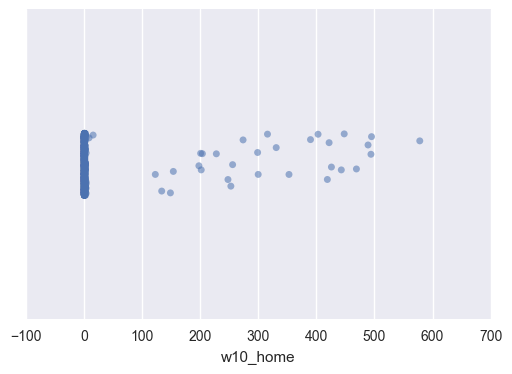

In [7]:
# Your code goes here
ax = sns.stripplot(x = train_20news_partA['w10_home'], data = train_20news_partA, jitter = True, alpha = 0.55)

<span style="color:red">You need to show attribute values against all classes. One way is to use: sns.stripplot(data=df, x='class', y='w36_adapter', jitter=True, alpha=.5)</span>

### ========== Question 1.8 ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

In [8]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

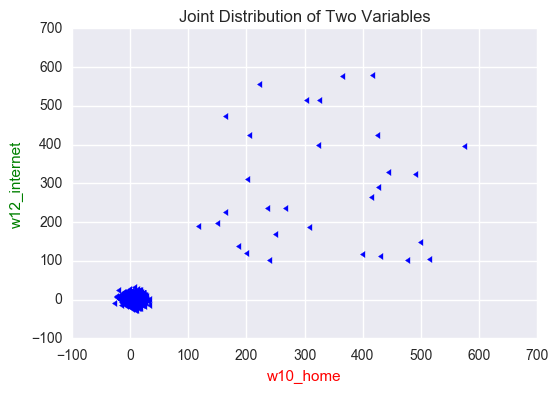

In [9]:
# Your code goes here
scatter_jitter(train_20news_partA['w10_home'], train_20news_partA['w12_internet'], jitter = 0.2)
plt.title('Joint Distribution of Two Variables',fontsize = 12)
plt.xlabel('w10_home', color = 'red')
plt.ylabel('w12_internet', color = 'green')

<span style="color:red">Good</span>

### ========== Question 1.9 ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

In [10]:
# Your code goes here
news_A_clean = pd.DataFrame(train_20news_partA)
t20newspA_mean = train_20news_partA.mean()
t20newspA_std = train_20news_partA.std()
t20newspA_index = len(train_20news_partA.index)
t20newspA_column = len(train_20news_partA.columns)
#Used in the construction of approximate 95% confidence intervals.
n = 1.96
#The upper and lower of the confidence intervals
CI_upper = t20newspA_mean + n * t20newspA_std
CI_lower = t20newspA_mean - n * t20newspA_std
attribute = pd.Series(train_20news_partA.columns)
#The outliers are out of the confidence intervals(>mean+1.96*std or <mean-1.96*std)
for c in range(len(attribute) - 1):
    news_A_clean = news_A_clean.ix[(news_A_clean[attribute[c]] <= CI_upper[c]) & 
                                   (news_A_clean[attribute[c]] >= CI_lower[c])]
print (news_A_clean)

      w1_aaa  w2_pins  w3_kmr  w4_notion  w5_queens  w6_dwyer  w7_defenseman  \
0          1        1       1          1          1         1              1   
1          1        1       1          1          1         1              1   
2          1        1       1          1          1         1              1   
3          1        1       1          1          1         1              1   
4          1        1       1          1          1         1              1   
5          1        1       1          1          1         1              1   
6          1        1       1          1          2         1              1   
7          1        1       1          1          1         1              1   
8          1        1       1          1          1         1              1   
9          1        1       1          1          1         1              1   
10         1        1       1          1          1         1              1   
11         1        1       1          1

<span style="color:red">Your criteria for detecting outliers (using mean and st. dev.) is reasonable. Other criteria may be using max value of the feature, or the document length. Also, plotting data with outliers can be more helpful and a reasonable justification for your criteria.</span>

### ========== Question 1.10 ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

In [11]:
# Your code goes here
news_A_clean_lengh = len(news_A_clean.index)
excluded_outliers = t20newspA_index - news_A_clean_lengh
print ("news_A_clean_lengh = %d\nexcluded_outliers = %d" % 
       (news_A_clean_lengh,excluded_outliers))

news_A_clean_lengh = 2091
excluded_outliers = 38


<span style="color:red">Good</span>

## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

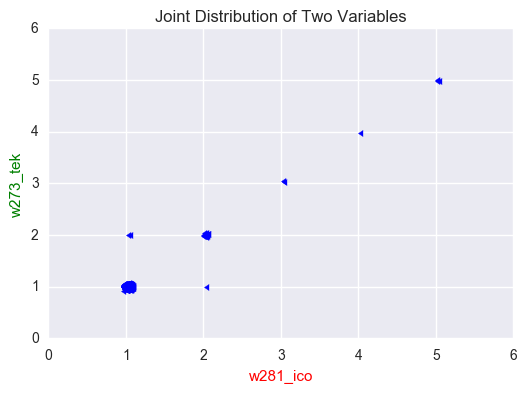

In [12]:
# Your code goes here
scatter_jitter(news_A_clean['w281_ico'], news_A_clean['w273_tek'], 
               jitter = 0.1)
plt.title('Joint Distribution of Two Variables',fontsize = 12)
plt.xlabel('w281_ico', color = 'red')
plt.ylabel('w273_tek', color = 'green')
plt.show()

<span style="color:red">Good</span>

### ========== Question 2.2 ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

*Your answer goes here:*  
1. The value of **different attributions** in the **same datapoint** is the **same** for most of the time. For example, most of the points in the figure appear in (1,1),(2,2)...Only a small part of which appears in (1,2) (2,1).
2. The Naive Bayes classifier uses the **conditional independence assumption**. However, as can be seen from the figure, these two attributions are **not independent of each other**. So it may affect the performance of the classifier.
3. If the attributes are not conditionally independent, then the sample space will be large, the reality that the training set is not large enough compared with the sample space, and the directly using the frequency to calculate P(x1,x2...xN|y) is very difficult, more importantly, usually the probability is zero and not being observed are not the same.



<span style="color:red">Good</span>

### ========== Question 2.3 ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [13]:
# Your code goes here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
features = news_A_clean.drop('class',axis= 1)
targets = pd.Series(news_A_clean['class'])
gnb = GaussianNB()
fit = gnb.fit(features, targets.values)
accuracy = fit.score(features, targets.values)
print("The classification accuracy = %.12f" % accuracy)

The classification accuracy = 0.889048302248


<span style="color:red">Good</span>

### ========== Question 2.4 ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

/Users/Meteor/anaconda/envs/iaml/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


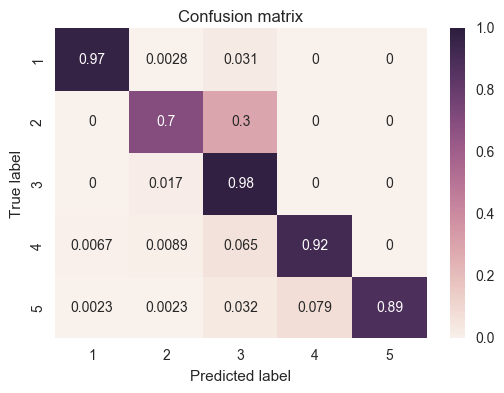

In [14]:
# Your code goes here
from sklearn.preprocessing import normalize
features_pre = fit.predict(features)
cm = confusion_matrix(targets, features_pre)
cm_norm = normalize(cm, norm = 'l1')
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
classes = [1,2,3,4,5]
plot_confusion_matrix(cm_norm, classes = classes)

<span style="color:red">Good</span>

### ========== Question 2.5  ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

*Your answer goes here*  
It look like what I would have expected. Because the classifaction accuracy is 0.889048302248, most of the classification is correct. But the  classification of *class 2* there are some deviations.

<span style="color:red">Classes comp.sys.ibm.pc.hardware and comp.sys.mac.hardware are confused with each other. Similarly, there is confusion between classes rec.sport.hockey and rec.sport.football</span>

### ========== Question 2.6 ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

In [15]:
# Your code goes here
unclean_features = train_20news_partA.drop('class',axis= 1)
unclean_targets = pd.Series(train_20news_partA['class'])
gnb = GaussianNB()
unclean_fit = gnb.fit(unclean_features, unclean_targets.values)
unclean_accuracy = unclean_fit.score(unclean_features, unclean_targets.values)
print("The classification accuracy on the unclean training dataset = %.12f" % unclean_accuracy)

The classification accuracy on the unclean training dataset = 0.205260685768


<span style="color:red">Good</span>

### ========== Question 2.7 ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

*Your answer goes here*  
Based on the performance of the classifier's training on a dataset that is not cleaned, outliers have a large effect on the performance of the classifier, since the values of the outliers are **100 times** the values of normal datapoints. And there is no other value (*eg 20,30,50*) between the value of outliers and the normal value in datapoints. So outliers make the performance of the classifier declining very quickly.


<span style="color:red">Naive Bayes is fitting gaussian distribution over discrete data, and gets most effected by the outliers.</span>

### ========== Question 2.8 ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

The classification accuracy on the test dataset = 0.835937500000


/Users/Meteor/anaconda/envs/iaml/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


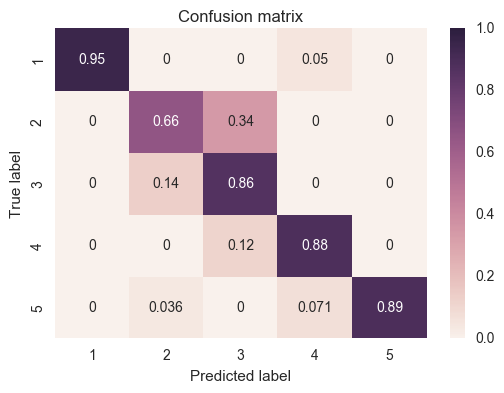

In [16]:
# Your code goes here
features_test = train_20news_partB.drop('class',axis= 1)
targets_test = pd.Series(train_20news_partB['class'])
features_test_pre = fit.predict(features_test)
cm_testb = confusion_matrix(targets_test, features_test_pre)
cm_norm_testb = normalize(cm_testb, norm = 'l1')
classes = [1,2,3,4,5]
plot_confusion_matrix(cm_norm_testb,classes = classes)
accuracy_testb = accuracy_score(targets_test, features_test_pre)
print("The classification accuracy on the test dataset = %.12f" % accuracy_testb)

<span style="color:red">Good</span>

### ========== Question 2.9 ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

*Your answer goes here*  
1. I think this is an acceptable level of performance.
2. The **class 1** is the **easiest** class to predict correctly. 
The **class 2** is the **most difficult** class to predict correctly.

<span style="color:red">Good</span>

### ========== Question 2.10 ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

*Your answer goes here*  
I think **most frequent classifier** could be a reasonable baseline. 

<span style="color:red">Good</span>

### ========== Question 2.11 ==========

Estimate the baseline performance.

In [17]:
# Your code goes here
def mostfrequent(targets,class_num):
    count = np.zeros((1,class_num))
    for t in targets:
        for n in range(class_num - 1):
            if t == n + 1:
                count[0][n] += 1
    max = np.max(count)
    for c in range(class_num - 1):
        if count[0][c] == max:
            return (c + 1)
    
mf = mostfrequent(targets, 5)
print("Class %d is the most frequent class in the training dataset" % mf)
def mfpredict(mf,targets):
    return [mf for t in targets]
pre_test = mfpredict(mf,targets_test)
accuracy_baseline = accuracy_score(targets_test, pre_test)
print("The baseline performance(most frequent classifier's accuracy) = %.12f" % accuracy_baseline)

Class 4 is the most frequent class in the training dataset
The baseline performance(most frequent classifier's accuracy) = 0.203125000000


<span style="color:red">Good</span>

### ========== Question 2.12 ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

Classification accuracy on the test set by using a Random Forest: 0.8515625


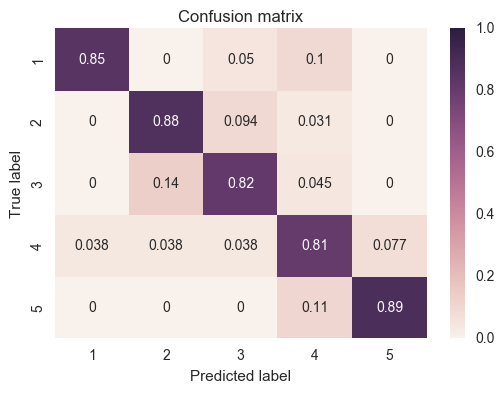

In [18]:
from sklearn.ensemble import RandomForestClassifier
X_tr = news_A_clean.drop('class',axis= 1)
y_tr = pd.Series(news_A_clean['class'])
rf = RandomForestClassifier(n_estimators = 50).fit(X=X_tr, y=y_tr)
X_ts = train_20news_partB.drop('class', axis=1)
y_ts = train_20news_partB['class']
rf_prediction = rf.predict(X=X_ts)
# Your code goes here
print('Classification accuracy on the test set by using a Random Forest:', accuracy_score(y_ts, rf.predict(X=X_ts)))
plt.figure()
cm = confusion_matrix(y_ts, rf_prediction)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
classes = [1,2,3,4,5]
plot_confusion_matrix(cm_norm, classes = classes)

<span style="color:red">Good</span>

### ========== Question 2.13 ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier.

*Your answer goes here.*  
1. I trust **Random Forest**.
2. Because in this particular problem, **some attributions are not conditionally independent**, that is to say some attributions are dependent, but the **Gaussian Naive Bayes classifier is based on the conditional independence assumption**, so the results and performance may be biased.

<span style="color:red">Another problem with NB is that it gets affected by outliers, but RF doesn't.</span>